In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
d = pd.read_csv(r'C:\Users\user\Downloads\C2_test.gender_submission.csv')
d

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
d['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [4]:
x = d.drop('Sex',axis=1)
y=d['Sex']

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
d.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
d1 = d[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex']]
d1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex
0,892,3,34.5,0,0,7.8292,male
1,893,3,47.0,1,0,7.0000,female
2,894,2,62.0,0,0,9.6875,male
3,895,3,27.0,0,0,8.6625,male
4,896,3,22.0,1,1,12.2875,female
...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,male
414,1306,1,39.0,0,0,108.9000,female
415,1307,3,38.5,0,0,7.2500,male
416,1308,3,NaN,0,0,8.0500,male


In [8]:
d1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Sex          418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [9]:
d2 = d1.fillna(0)

In [10]:
x = d2[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]
y = d2['Sex']

In [11]:
g1 = {"Sex":{'Male':1,'Female':2}}
d2= d2.replace(g1)
print(d2)

     PassengerId  Pclass   Age  SibSp  Parch      Fare     Sex
0            892       3  34.5      0      0    7.8292    male
1            893       3  47.0      1      0    7.0000  female
2            894       2  62.0      0      0    9.6875    male
3            895       3  27.0      0      0    8.6625    male
4            896       3  22.0      1      1   12.2875  female
..           ...     ...   ...    ...    ...       ...     ...
413         1305       3   0.0      0      0    8.0500    male
414         1306       1  39.0      0      0  108.9000  female
415         1307       3  38.5      0      0    7.2500    male
416         1308       3   0.0      0      0    8.0500    male
417         1309       3   0.0      1      1   22.3583    male

[418 rows x 7 columns]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
parameters = {
    'max_depth':[10,20,50,60,30],
    'min_samples_leaf':[35,16,75,70,45],
    'n_estimators':[10,20,30,40,50]
}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
grid_search = GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50, 60, 30],
                         'min_samples_leaf': [35, 16, 75, 70, 45],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [19]:
grid_search.best_score_

0.6746575342465754

In [20]:
from sklearn.tree import plot_tree

In [21]:
rfc_best= grid_search.best_estimator_

[Text(2949.428571428571, 2935.44, 'SibSp <= 0.5\ngini = 0.459\nsamples = 173\nvalue = [104, 188]\nclass = No'),
 Text(2072.5714285714284, 2283.12, 'Fare <= 13.458\ngini = 0.427\nsamples = 121\nvalue = [64, 143]\nclass = No'),
 Text(1275.4285714285713, 1630.8000000000002, 'Fare <= 7.788\ngini = 0.312\nsamples = 73\nvalue = [23, 96]\nclass = No'),
 Text(637.7142857142857, 978.48, 'Age <= 21.5\ngini = 0.436\nsamples = 36\nvalue = [17, 36]\nclass = No'),
 Text(318.85714285714283, 326.1600000000003, 'gini = 0.365\nsamples = 18\nvalue = [6, 19]\nclass = No'),
 Text(956.5714285714284, 326.1600000000003, 'gini = 0.477\nsamples = 18\nvalue = [11, 17]\nclass = No'),
 Text(1913.1428571428569, 978.48, 'PassengerId <= 1028.5\ngini = 0.165\nsamples = 37\nvalue = [6, 60]\nclass = No'),
 Text(1594.2857142857142, 326.1600000000003, 'gini = 0.067\nsamples = 16\nvalue = [1, 28]\nclass = No'),
 Text(2232.0, 326.1600000000003, 'gini = 0.234\nsamples = 21\nvalue = [5, 32]\nclass = No'),
 Text(2869.714285714

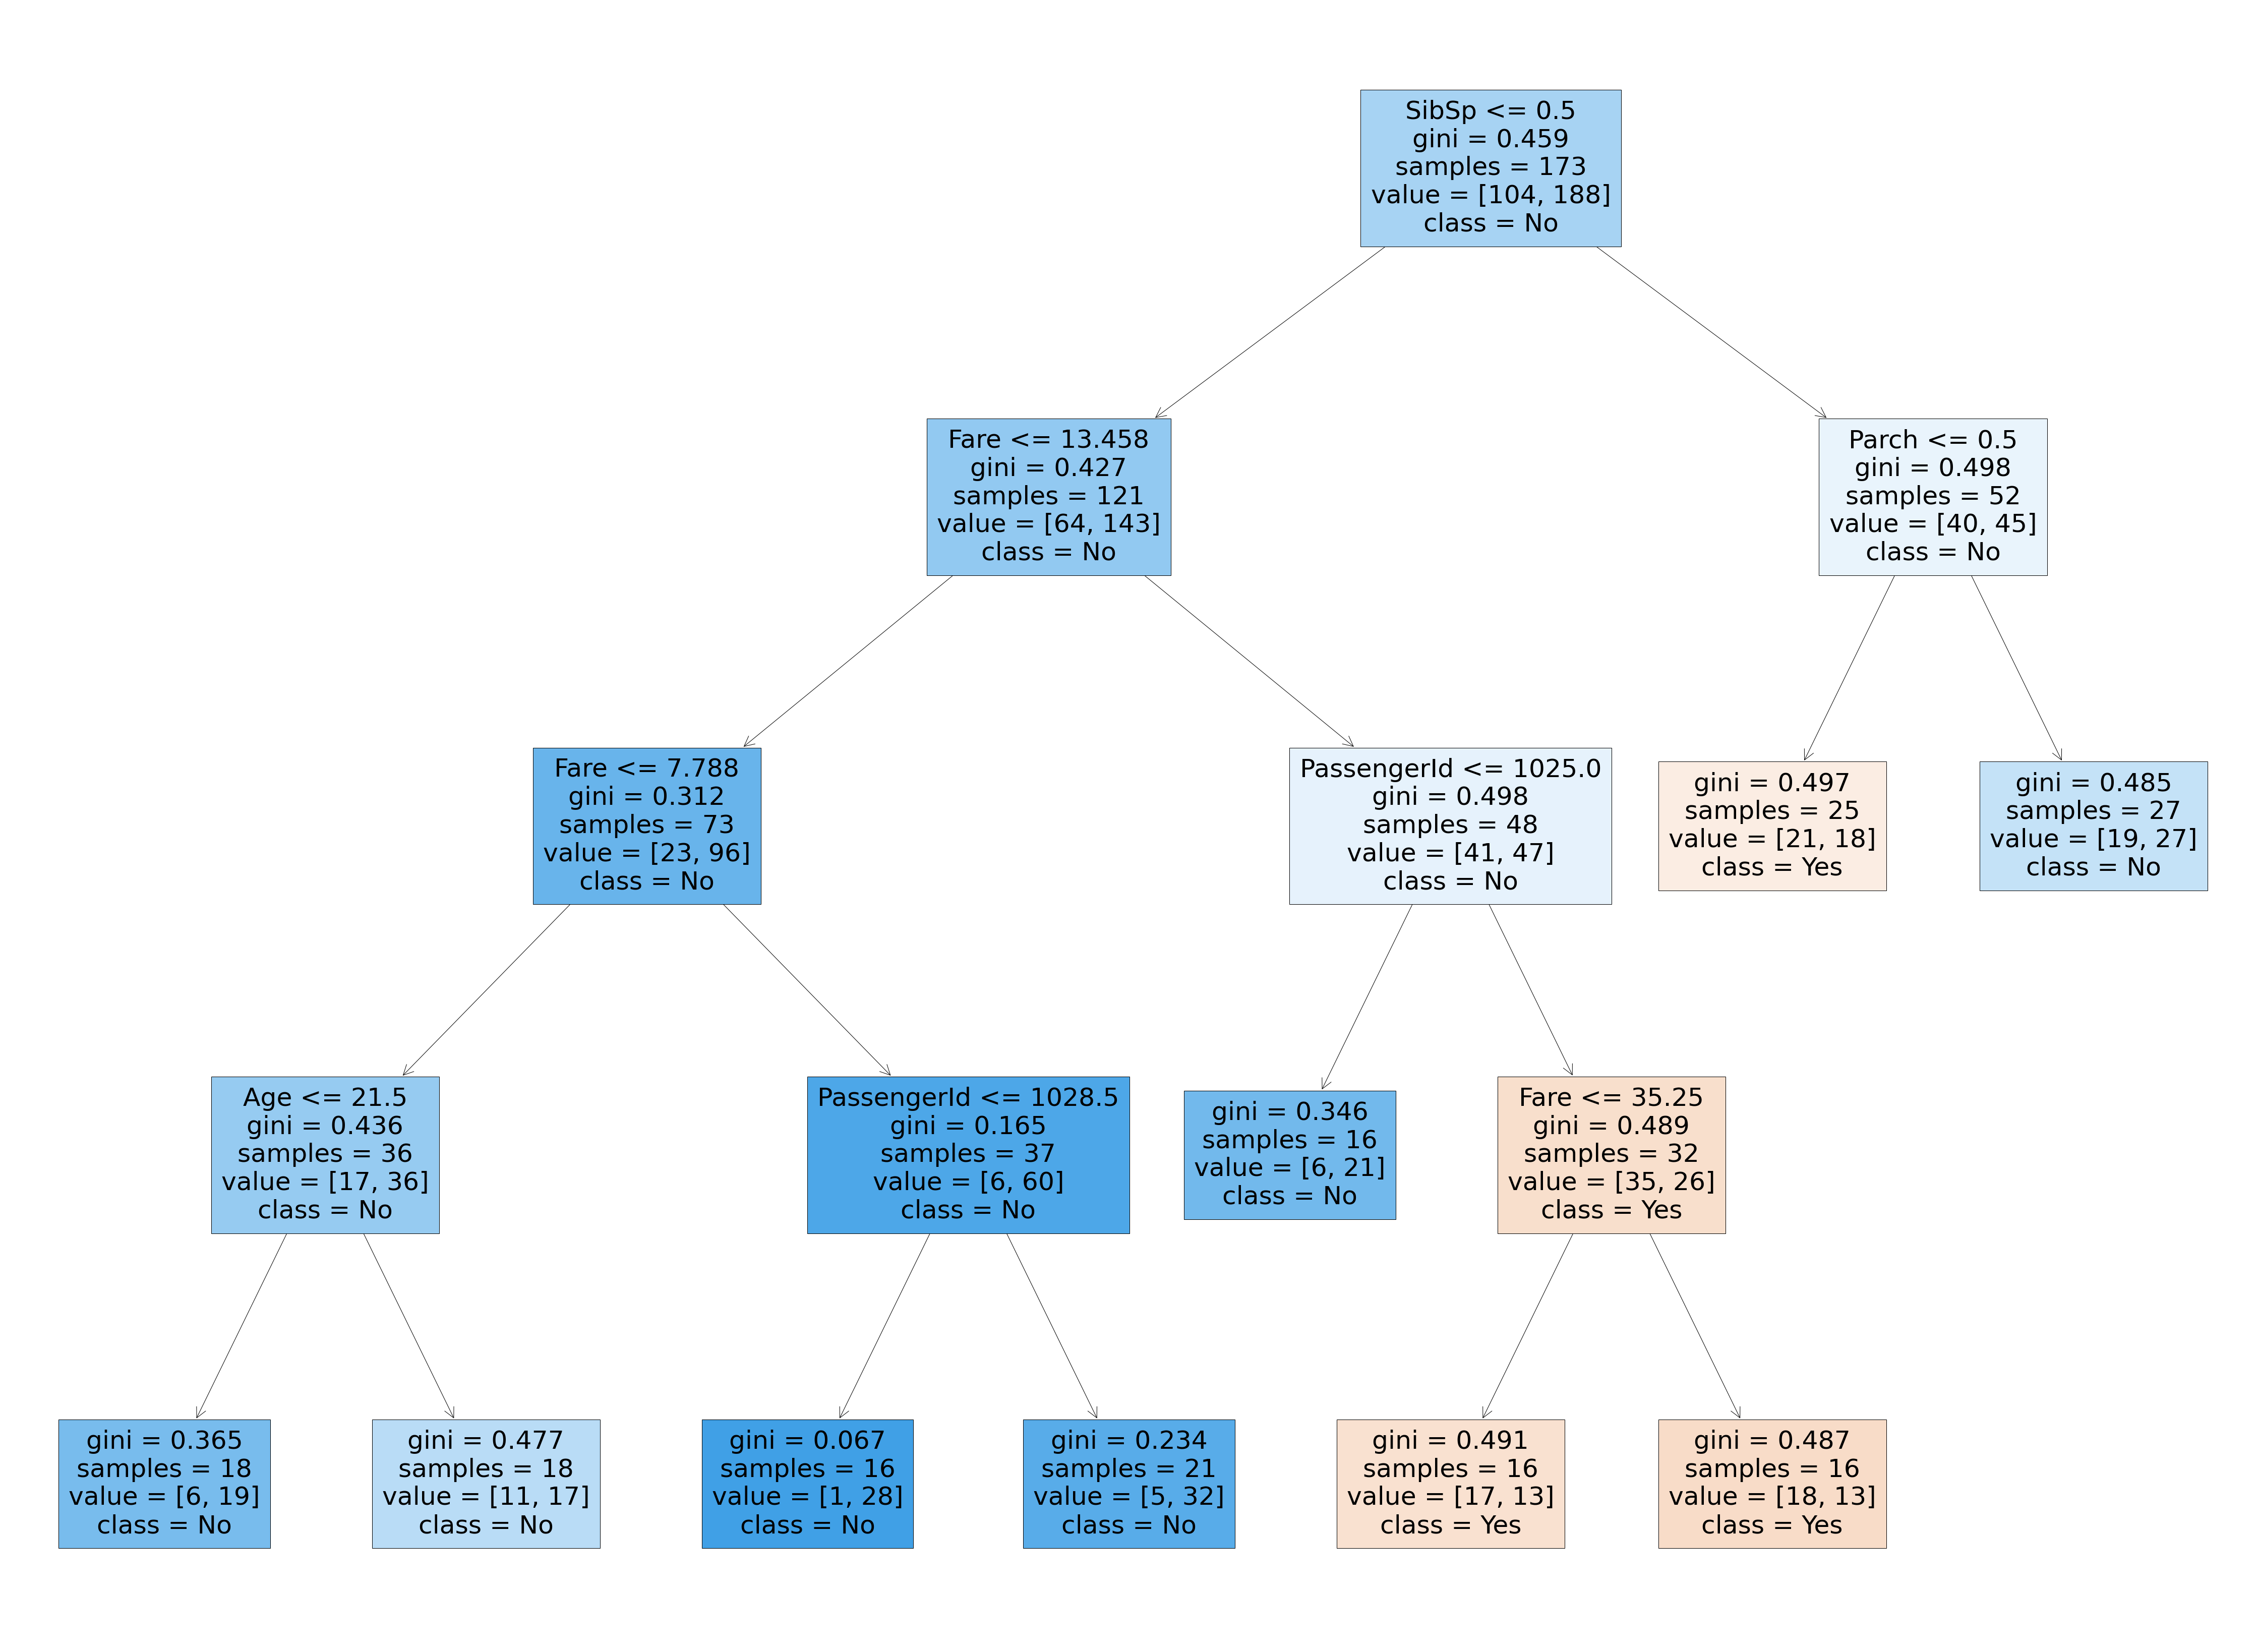

In [22]:
plt.figure(figsize=(80,60))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=["Yes","No"],filled=True)